In [1]:
!pip install mglearn

In [2]:
!pip install pydotplus

In [3]:
!pip install graphviz

In [4]:
import mglearn
import pydotplus
from graphviz import Source
# Set full screen mode
from IPython.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))
        
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interactive
from ipykernel.pylab.backend_inline import flush_figures
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import SVG
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [5]:
dftrial=pd.read_csv('trial.csv')
dfauditrisk=pd.read_csv('audit_data.csv')

In [6]:
dftrial.info()
dfauditrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [7]:
dfauditrisk = pd.concat([dfauditrisk,dftrial[['Marks','MONEY_Marks','LOSS_SCORE','History_score','Loss']]],axis = 1)
dfauditrisk.head()
dfauditrisk['Money_Value']
#dfauditrisk['Money_Value'] = dfauditrisk['Money_Value'].fillna(dfauditrisk['Money_Value'].mean())
dfauditrisk['Money_Value'].mean()
dfauditrisk.Money_Value[dfauditrisk.Money_Value.isnull() == True] =dfauditrisk['Money_Value'].mean()

In [8]:
dfauditrisk['Money_Value']

0       3.38
1       0.94
2       0.00
3      11.75
4       0.00
       ...  
771     0.00
772     0.00
773     0.00
774     0.00
775     0.32
Name: Money_Value, Length: 776, dtype: float64

In [9]:
dfauditriskclean = dfauditrisk.drop(['Risk','LOCATION_ID'],axis = 1)

In [10]:
dfauditriskclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   PARA_A          776 non-null    float64
 2   Score_A         776 non-null    float64
 3   Risk_A          776 non-null    float64
 4   PARA_B          776 non-null    float64
 5   Score_B         776 non-null    float64
 6   Risk_B          776 non-null    float64
 7   TOTAL           776 non-null    float64
 8   numbers         776 non-null    float64
 9   Score_B.1       776 non-null    float64
 10  Risk_C          776 non-null    float64
 11  Money_Value     776 non-null    float64
 12  Score_MV        776 non-null    float64
 13  Risk_D          776 non-null    float64
 14  District_Loss   776 non-null    int64  
 15  PROB            776 non-null    float64
 16  RiSk_E          776 non-null    float64
 17  History         776 non-null    int

In [11]:
dfauditrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     776 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [12]:
Feature= widgets.Dropdown(options= list(dfauditrisk.drop(['Risk','LOCATION_ID'],axis = 1).columns))
Plot_Type= widgets.RadioButtons(options= ['Distribution Plot','Box Plot'])

def plotit(Feature,Plot_Type):                            
    
    %matplotlib inline
    plt.figure(figsize = (16,5))
    if Plot_Type == 'Distribution Plot':
        sns.distplot(dfauditrisk.drop(['Risk','LOCATION_ID'],axis = 1)[Feature])    
        plt.ylabel('freq')
        plt.title(Feature +' : Distribution')

    elif Plot_Type == 'Box Plot':
        sns.boxplot(x=dfauditrisk.drop(['Risk','LOCATION_ID'],axis = 1)[Feature])    
        plt.title(Feature +' : Box Plot')
    flush_figures()
                            
interactive(plotit, Feature=Feature,Plot_Type=Plot_Type)

interactive(children=(Dropdown(description='Feature', options=('Sector_score', 'PARA_A', 'Score_A', 'Risk_A', …

In [13]:
dfauditriskclean=dfauditriskclean.drop('Detection_Risk',axis = 1)


In [14]:

#Select_X= widgets.Dropdown(options= list(dfauditrisk.drop(['Risk','LOCATION_ID'],axis = 1).columns))
#Select_Y= widgets.Dropdown(options= list(dfauditrisk.drop(['Risk','LOCATION_ID'],axis = 1).columns))

#def plotit_regplt(Select_X,Select_Y):
 #   plt.figure(figsize = (16,5))
  #  sns.regplot(x=Select_X, y=(Select_Y),data=dfauditrisk.drop(['Risk','LOCATION_ID'],axis = 1))
   # flush_figures()
#interactive(plotit_regplt, Select_X=Select_X,Select_Y=Select_Y)

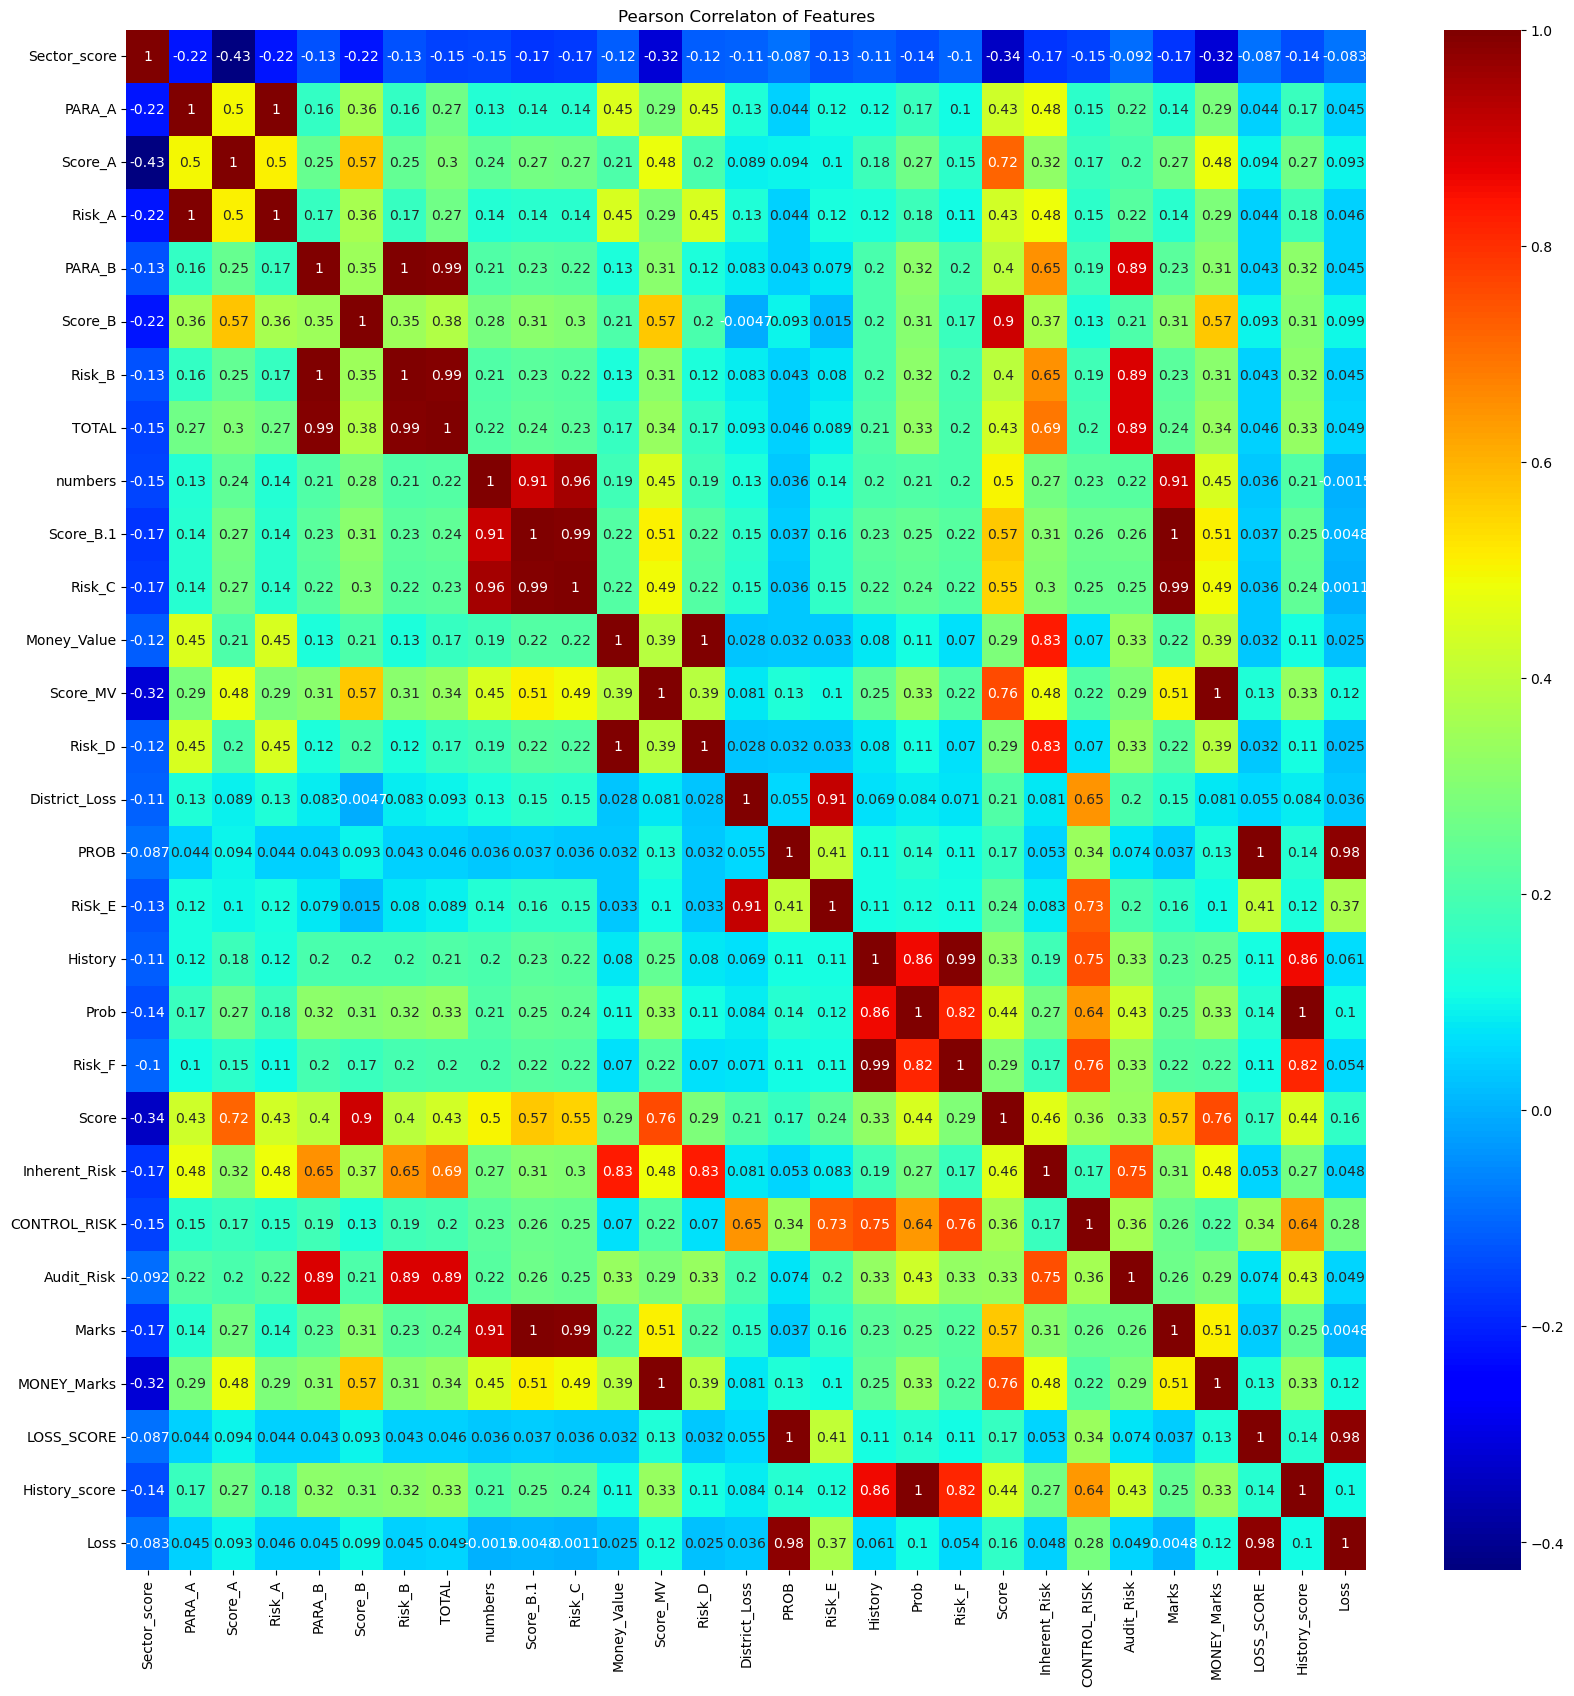

In [15]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlaton of Features')
heat = sns.heatmap(dfauditriskclean.corr(),annot=True,cmap="jet");

In [16]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.columns)
correlation(dfauditriskclean,0.9)    

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'PROB', 'History', 'Prob',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk'],
      dtype='object')


In [17]:
y = dfauditriskclean['Audit_Risk']
x = dfauditriskclean.drop('Audit_Risk',axis = 1)


In [18]:
list(x.columns)

['Sector_score',
 'PARA_A',
 'Score_A',
 'PARA_B',
 'Score_B',
 'numbers',
 'Money_Value',
 'Score_MV',
 'District_Loss',
 'PROB',
 'History',
 'Prob',
 'Inherent_Risk',
 'CONTROL_RISK']

In [19]:
x.describe()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,numbers,Money_Value,Score_MV,District_Loss,PROB,History,Prob,Inherent_Risk,CONTROL_RISK
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,10.799988,0.313144,5.067655,14.137631,0.290979,2.505155,0.206186,0.104381,0.216753,17.680612,0.572680
std,24.319017,5.678870,0.174055,50.083624,0.169804,0.264449,66.563533,0.159745,1.228678,0.037508,0.531031,0.067987,54.740244,0.444581
min,1.850000,0.000000,0.200000,0.000000,0.200000,5.000000,0.000000,0.200000,2.000000,0.200000,0.000000,0.200000,1.400000,0.400000
25%,2.370000,0.210000,0.200000,0.000000,0.200000,5.000000,0.000000,0.200000,2.000000,0.200000,0.000000,0.200000,1.583500,0.400000
50%,3.890000,0.875000,0.200000,0.405000,0.200000,5.000000,0.095000,0.200000,2.000000,0.200000,0.000000,0.200000,2.214000,0.400000
75%,55.570000,2.480000,0.600000,4.160000,0.400000,5.000000,5.630000,0.400000,2.000000,0.200000,0.000000,0.200000,10.663500,0.400000
max,59.850000,85.000000,0.600000,1264.630000,0.600000,9.000000,935.030000,0.600000,6.000000,0.600000,9.000000,0.600000,801.262000,5.800000


In [20]:
flist = ['Sector_score','PARA_A','PARA_B','numbers','Money_Value','District_Loss','PROB','History','Prob']

In [21]:
x=x[flist]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
plreg = LinearRegression()
train_score,cvalmean_score = 0,0
poly = PolynomialFeatures(2)
X_testpoly = poly.fit_transform(X_test)
X_trainpoly = poly.fit_transform(X_train)#preparing the variables for the regression as per the degree n
plreg.fit(X_trainpoly, y_train)#linear regression on polynomial data  
scores = cross_val_score(plreg, X_trainpoly,y_train,cv = 5)
train_score=(plreg.score(X_trainpoly, y_train))#Appending the polynomial scores to the linear scores
cvalmean_score=(scores.mean())#Appending the polynomial scores to the linear scores
print("Train set score with degree " +  str(2)  +" : {}".format(plreg.score(X_trainpoly, y_train)))
print("Cross-validation scores with degree " +  str(2)  + ": {}".format(scores))


Train set score with degree 2 : 0.9995754887405587
Cross-validation scores with degree 2: [ 0.99505042  0.98787287  0.98836912 -0.39386834  0.98981268]


In [22]:
y_pred=plreg.predict(X_testpoly)
print(y_pred)
#for i in range(0,len(y_pred)):
 #   if y_pred[i]==y_test[i]:
  #      print(y_pred[i])
   # else:
    #    print(y_test[i])
f = open('Regressionresult.csv','a')#append the lines into the file
line = 'Poly,d= 2,'  +str(plreg.score(X_trainpoly,y_train)) + ',' + str(plreg.score(X_testpoly, y_test)) + '\n'
f.write(line)
f.close()

[ 5.17510802e+00  2.29770284e+01  2.93377517e-01  2.97891914e-01
  1.56453226e+00  6.08638158e-01  3.41956736e-01  4.33439921e-01
  3.76577622e-01  2.55921982e-01  1.77510196e+01  8.82794634e+00
  2.75607395e-01  2.52401502e-01  6.62266022e+01  3.12678958e-01
  3.45493846e-01  3.00881219e+00  1.89272883e+00  1.41897413e+00
  1.96613567e-01  1.06882071e+00  2.43597707e-01  2.53281678e-01
  4.88544516e+00  3.45208114e-01  3.02267476e+01  3.96967422e-01
  1.51512228e+00  3.45546137e-01  2.34790206e-01  3.46985638e-01
  2.34790206e-01  5.30679603e+01  6.26139045e-01  2.60930725e-01
  2.34790206e-01  2.45865028e-01  9.98992577e-01  4.23448921e+00
  1.96613567e-01  4.55800748e+01  1.19254559e+00  1.47731130e+00
  3.33972221e+00  2.25323039e-01  2.53168923e-01  4.93517464e+00
  5.04420290e-01  6.28322657e+00  1.35881764e+01  4.46481821e-01
  4.51153157e-01  4.36424972e-01  3.41374661e-01  3.25991219e+00
  4.31005983e-01  8.81003268e-01  6.58511621e-01  8.19427366e-01
  3.01634255e-01  2.71756

In [23]:
# KNN REGRESSION


param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17]}
#print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
knnreg = KNeighborsRegressor(grid_search.best_params_['n_neighbors'])
knnreg.fit(X_train, y_train)
test_score = knnreg.score(X_test, y_test)
train_score = knnreg.score(X_train, y_train)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))
y1_pred=knnreg.predict(X_test)
print(y1_pred)
f = open('Regressionresult.csv','a')#append the lines into the file
line = 'KNeighborsRegressor,k = 1,'  +str(knnreg.score(X_train,y_train)) + ',' + str(knnreg.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.73
Train set score with best parameters: 1.00
Test set score with best parameters: 0.14
[  4.0948    18.7368     0.3044     0.3148     1.5308     0.4824
   0.3468     0.788      0.3412     0.290068  21.4896     7.1472
   0.3132     0.2868   204.7808     0.3092     0.3824     0.736
   0.2892     1.4436     0.28       1.32       0.2844     0.2868
   3.8332     0.3468     6.036      0.328      0.8996     0.3312
   0.28       0.392      0.28      21.4224     0.7276     0.290068
   0.28       0.2884     0.9672     3.982      0.28      13.256
   1.142      1.4964     3.6068     0.2832     0.2992    17.1312
   0.338      7.7956    13.8436     0.3752     0.4036     0.4104
   0.3212     2.0404     0.72       0.7564     0.7508     0.9044
   0.3112     0.2964     0.2892     0.7564     0.304      0.3936
   0.2904     0.402      0.3216     1.0744     0.3168     0.8996
   2.7048     7.9576     0.2808     0.3092     0.3308     0.2868


In [43]:
#DECISION TREE REGRESSION

Dstreg = DecisionTreeRegressor()
Dstreg.fit(X_train,y_train)
print(Dstreg.score(X_train,y_train))
scores = cross_val_score(Dstreg, X_train,y_train,cv = 5)
print("Cross-validation scores : {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
y2_pred=Dstreg.predict(X_test)
print(y2_pred)
f = open('Regressionresult.csv','a')#append the lines into the file
line = 'DecisionTreeRegressor'  +str(Dstreg.score(X_train,y_train)) + ',' + str(Dstreg.score(X_test,y_test)) + '\n'
f.write(line)
f.close()

1.0
Cross-validation scores : [0.5416786  0.22865541 0.75812375 0.62553925 0.31213202]
Average cross-validation score: 0.49
[ 3.8744   23.0832    0.3104    0.3124   37.1926    0.5116    0.3284
  0.72      0.3396    0.290068 17.2612   11.1928    0.3036    0.290068
 24.7264    0.3092    0.3828    0.824    37.1926    1.4436    0.28
  1.3476    0.2836    0.290068  4.5132    0.3284   47.3616    0.3348
  1.8304    0.3296    0.28      0.3912    0.28     57.3328    0.7012
  0.290068  0.28      0.2976    0.92      3.982     0.28     62.9856
  1.1184    1.4964    3.6068    0.2912    0.282     8.5056    0.394
  3.5168   13.8436    0.4048    0.4036    0.5552    0.318     2.0404
  0.72      0.978     0.7508    0.9044    0.3112    0.2964   14.7472
  1.316     0.3032    0.4528    0.292     0.402     0.3312    1.0744
  0.3608    0.8996    2.7048   10.3212    0.2808    0.3036    0.3124
  0.290068  0.5028   24.7264    0.3052    0.2828    2.9056    0.4292
  3.8744    0.282     0.3356    0.5776    0.29006

In [44]:
results_regression = pd.read_csv('Regressionresult.csv')
results_regression


,Poly,d= 2,0.9995754887405587,0.9775625342342605
0,KNeighborsRegressor,k = 1,1.000000,0.135055
1,DecisionTreeRegressor1.0,0.12231982628293714,NaN,NaN
2,Poly,d= 2,0.999575,0.977563
3,KNeighborsRegressor,k = 1,1.000000,0.135055
4,DecisionTreeRegressor1.0,0.11204118216193448,NaN,NaN
5,Poly,d= 2,0.999575,0.977563
6,KNeighborsRegressor,k = 1,1.000000,0.135055
7,DecisionTreeRegressor1.0,0.17149244049094858,NaN,NaN
8,Poly,d= 2,0.999575,0.977563
9,KNeighborsRegressor,k = 1,1.000000,0.135055


In [45]:
# classification

In [46]:
dfauditrisk.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

In [47]:
dftrial.Risk.value_counts()

1    486
0    290
Name: Risk, dtype: int64

In [48]:
X1 = dfauditrisk[flist]
y1 = dfauditrisk.Risk
X1.head()

,Sector_score,PARA_A,PARA_B,numbers,Money_Value,District_Loss,PROB,History,Prob
0,3.89,4.18,2.50,5.0,3.38,2,0.2,0,0.2
1,3.89,0.00,4.83,5.0,0.94,2,0.2,0,0.2
2,3.89,0.51,0.23,5.0,0.00,2,0.2,0,0.2
3,3.89,0.00,10.80,6.0,11.75,2,0.2,0,0.2
4,3.89,0.00,0.08,5.0,0.00,2,0.2,0,0.2


In [49]:
y1.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

In [50]:
#X1 = dfauditrisk[flist]
#y1 = dfauditrisk.Risk
#Select_X= widgets.Dropdown(options= list(X1.columns))
#Select_Y= widgets.Dropdown(options= list(X1.columns))

#def plotit_regplt(Select_X,Select_Y):
 #   X1 = dfauditrisk[flist]
  #  y1 = dfauditrisk.Risk
   # plt.figure(figsize = (16,5))
    #sns.scatterplot(x=Select_X, y=Select_Y,data=X1,hue = y1)
    #flush_figures()
#interactive(plotit_regplt, Select_X=Select_X,Select_Y=Select_Y)

In [51]:
X1 = dfauditrisk[flist]
y1 = dfauditrisk.Risk
Variable = widgets.Dropdown(options= list(X1.columns))

def plotit(Variable):
    X1 = dfauditrisk[flist]
    y1 = dfauditrisk.Risk
    key = Variable
    x = pd.crosstab(dfauditrisk[key],dfauditrisk.Risk)
    x.plot(kind="bar",figsize=(15,6),stacked=True)
    plt.title(key + ' vs Risk')
    plt.show() 
    
interactive(plotit, Variable=Variable)

interactive(children=(Dropdown(description='Variable', options=('Sector_score', 'PARA_A', 'PARA_B', 'numbers',…

In [52]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

print("Size of training set: {}      size of test set:"
      " {}\n".format(X1_train.shape[0], X1_test.shape[0]))

Size of training set: 582      size of test set: 194



In [53]:
#SUPPORT VECTOR MACHINE CLASSIFICATION
param_svm= {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear']}
Svmlin = GridSearchCV(SVC(probability=True),param_svm,cv = 5,refit=True,verbose=3)
Svmlin.fit(X1_train,y1_train)
print(Svmlin.best_params_)
print(Svmlin.best_estimator_)
print(Svmlin.best_score_)
print(Svmlin.best_index_)
svm_linear_best = SVC(C=1000,kernel='linear',probability=True)
svm_linear_best.fit(X1_train,y1_train)
print(svm_linear_best.score(X1_train,y1_train))
scores = cross_val_score(svm_linear_best, X1_train,y1_train,cv = 5)
print("Cross-validation scores : {}".format(scores))
predictions = svm_linear_best.predict(X1_test)
print(predictions)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.923 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.914 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.931 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.922 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.949 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.991 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,

In [54]:
#KNN CLASSIFICATION

param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17]}
knnclass = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
knnclass.fit(X1_train, y1_train)
print("Best parameters: {}".format(knnclass.best_params_))
print("Best cross-validation score: {:.2f}".format(knnclass.best_score_))
Knncl = KNeighborsClassifier(n_neighbors =1)
Knncl.fit(X1_train, y1_train)    
predictionsknncl = Knncl.predict(X1_test)
print(predictionsknncl)


Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.98
[1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1
 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 0]


In [55]:
#LOGISTICREGRESSION CLASSIFICATION

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,1500,2000,2500,3000],'penalty' : ['l1','l2']}
Logisticclass = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
Logisticclass.fit(X1_train, y1_train)
print("Best parameters: {}".format(Logisticclass.best_params_))
print("Best cross-validation score: {:.2f}".format(Logisticclass.best_score_))
Logisticcl= LogisticRegression(penalty = 'l2', C = 2000)
Logisticcl.fit(X1_train,y1_train)
predictionsLgcl = Logisticcl.predict(X1_test)
print(predictionsLgcl)

Best parameters: {'C': 2000, 'penalty': 'l2'}
Best cross-validation score: 0.99
[1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1
 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 0]


In [56]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Define your classifiers here (e.g., plreg, knnreg, Dstreg, svm_linear_best, Knncl, Logisticcl)
classifiers = [ svm_linear_best, Knncl, Logisticcl]
classifier_names = [ "SVM Classification", "KNN Classification", "Logistic Regression"]

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Classifier", "Accuracy", "Error Rate", 
                                    "True Positive Rate", "False Positive Rate", 
                                    "F-Measure", "AUC"])

# Split the data into train and test sets (assuming X_test and y_test are defined)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
y1_test = (y_test > 0.5).astype(int)
y1_test=y1_test[0:156]
# Iterate through classifiers and calculate metrics
for clf, clf_name in zip(classifiers, classifier_names):
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)
    y1_pred = (y1_pred > 0.5).astype(int)
    accuracy = accuracy_score(y1_test, y1_pred)
    confusion = confusion_matrix(y1_test, y1_pred)
    tn, fp, fn, tp = confusion.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    f_measure = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
    
    if clf_name == "Linear Regression":
        auc = 0  # Linear Regression doesn't produce probabilities for AUC
    else:
        y_proba = clf.predict_proba(X1_test)[:, 1]
        auc = roc_auc_score(y1_test, y_proba)
    
    error_rate = 1 - accuracy
    
    # Append results to the DataFrame
    results_df = results_df.append({"Classifier": clf_name, "Accuracy": accuracy, 
                                    "Error Rate": error_rate, "True Positive Rate": tpr, 
                                    "False Positive Rate": fpr, "F-Measure": f_measure, "AUC": auc},
                                    ignore_index=True)

# Display the results in tabular form
print(results_df)


            Classifier  Accuracy  Error Rate  True Positive Rate  \
0   SVM Classification  0.532051    0.467949            0.422535   
1   KNN Classification  0.519231    0.480769            0.394366   
2  Logistic Regression  0.532051    0.467949            0.422535   

   False Positive Rate  F-Measure       AUC  
0             0.376471   0.503722  0.537531  
1             0.376471   0.483152  0.508948  
2             0.376471   0.503722  0.540182  


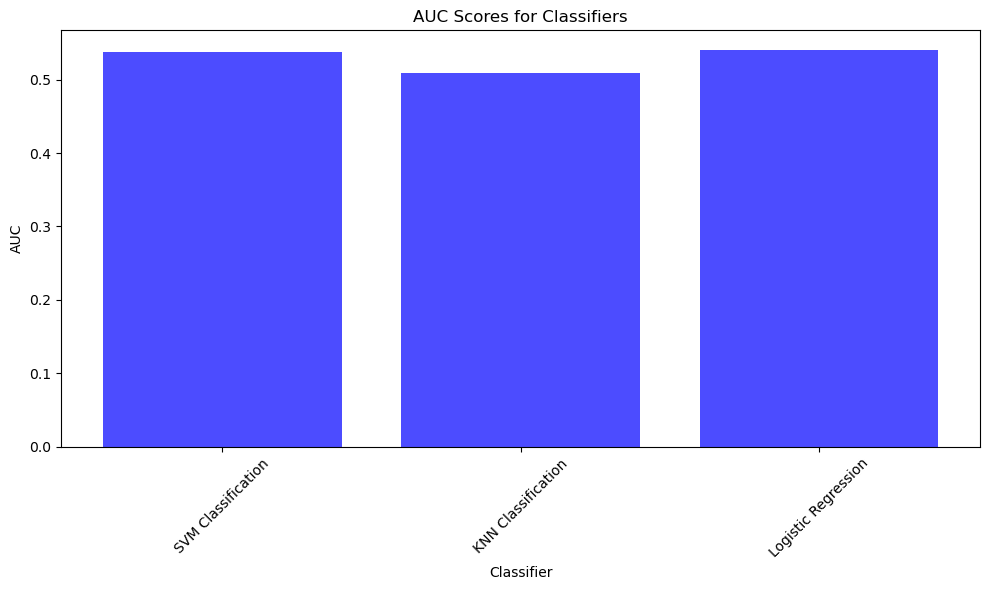

In [41]:
classifier_names = results_df["Classifier"]
auc_values = results_df["AUC"]


plt.figure(figsize=(10, 6))
plt.bar(classifier_names, auc_values, color='blue', alpha=0.7)
plt.xlabel("Classifier")
plt.ylabel("AUC")
plt.title("AUC Scores for Classifiers")
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()
